In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 442 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [5]:
#To define Linear initialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [6]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [7]:
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [10]:
r = model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 40s 3s/step - loss: 0.6561 - accuracy: 0.6357 - val_loss: 0.6773 - val_accuracy: 0.5950
Epoch 2/10
14/14 [==============================] - 39s 3s/step - loss: 0.6562 - accuracy: 0.6357 - val_loss: 0.6781 - val_accuracy: 0.5950
Epoch 3/10
14/14 [==============================] - 38s 3s/step - loss: 0.6560 - accuracy: 0.6357 - val_loss: 0.6780 - val_accuracy: 0.5950
Epoch 4/10
14/14 [==============================] - 40s 3s/step - loss: 0.6559 - accuracy: 0.6357 - val_loss: 0.6786 - val_accuracy: 0.5950
Epoch 5/10
14/14 [==============================] - 40s 3s/step - loss: 0.6560 - accuracy: 0.6357 - val_loss: 0.6783 - val_accuracy: 0.5950
Epoch 6/10
14/14 [==============================] - 41s 3s/step - loss: 0.6563 - accuracy: 0.6357 - val_loss: 0.6794 - val_accuracy: 0.5950
Epoch 7/10
14/14 [==============================] - 40s 3s/step - loss: 0.6559 - accuracy: 0.6357 - val_loss: 0.6787 - val_accuracy: 0.5950
Epoch 8/10
14/14 [==

In [11]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 7s 2s/step


In [12]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [13]:
print(len(predictions))

121


In [14]:
model.save("forest2.h5")

In [15]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [16]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

1/1 [==============================] - 0s 144ms/step
[[0.36464423]]


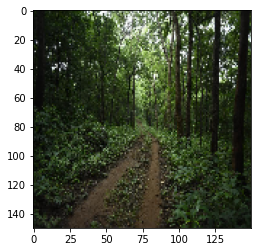

In [17]:
predictImage("/content/drive/MyDrive/test_set/forest/0.64133000_1519374442_forest_deep.jpg")

In [18]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.7 MB/s 


In [19]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7038 sha256=38a29b44a84fb756d4c1f8104c35cdeecf1add74c980064aab0d3b2e1b1e20eb
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [20]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [24]:
#load the saved model
model = load_model(r'forest2.h5')
#define video
video = cv2.VideoCapture('/content/FOREST  FIRE.mp4')
#define the features
name = ['forest','with forest']

In [23]:
account_sid = 'AC4c9a105651d0150d1b85af1bd4cf090c'
auth_token = 'd18b90389f18b6069775b89c5c10ca1f'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+15134660214',
      #to number
      to='+919361632961')
     

print(message.sid)

SM3c78ddeb8564584a600aecc9950f4477
